In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
print(tf.__version__)

1.12.0


In [45]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [46]:
class_names=['T-shirt/top', 'Trouser', "Pullover", 'Dress', 'Coat', 'Sandal',
             'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_images)

60000

In [17]:
len(test_images)

10000

In [18]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape


(10000, 28, 28)

In [21]:
len(test_images)

10000

In [23]:
len(test_labels)


10000

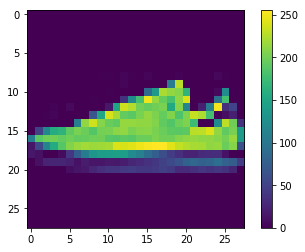

In [26]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
# normalising the images
train_images=train_images/255.0
test_images=test_images/255.0

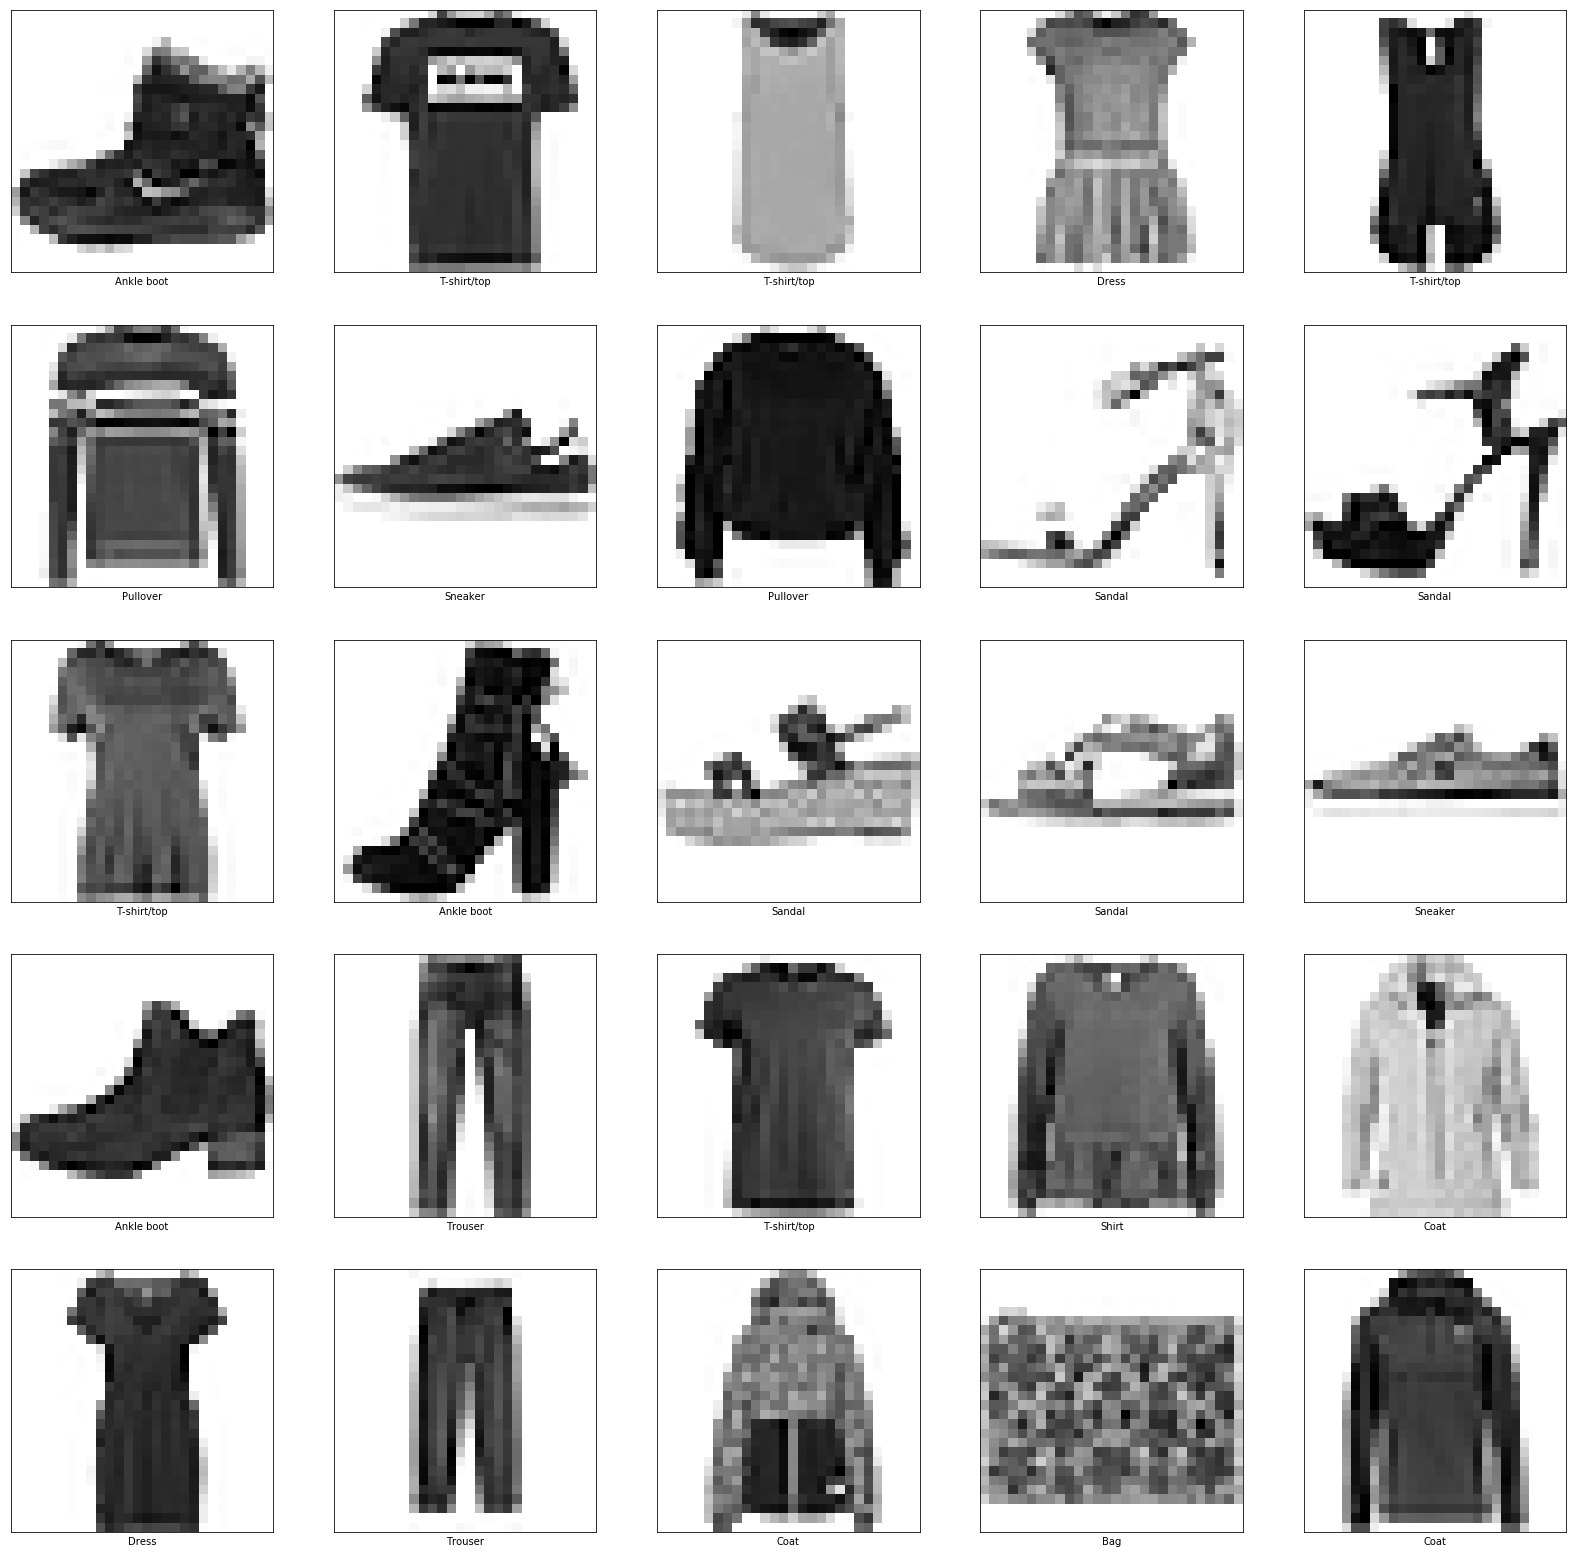

In [32]:
plt.figure(figsize=(28,28))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    
    

In [33]:
#building the model

model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128, activation=tf.nn.relu),
                        keras.layers.Dense(10, activation=tf.nn.softmax)
                       ])



In [34]:
#compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



In [36]:
#training the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.5021 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.3751 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3341 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3116 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.2944 - acc: 0.8911


In [37]:
#evaluating accuracy for the testing model

test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test Accuracy', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test Accuracy 0.8684


In [38]:
#prediction os some images

predictions=model.predict(test_images)

In [41]:
predictions[0]

array([3.25578003e-05, 3.42694238e-06, 1.51983238e-06, 8.21514504e-07,
       2.54456936e-05, 1.03997745e-01, 9.71593181e-05, 8.32242221e-02,
       1.23382284e-04, 8.12493682e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [67]:
test_labels[0]

9

In [73]:
#formation of graph to look at the full set of 10 channels

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array), 
                                       class_names[true_label]),
                                        color=color)
    
    

In [76]:
def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_label=predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label= np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

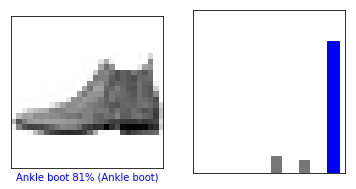

In [77]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
_